
# Assignment01-Q1


Author: Dr. T. Smith (timsmith@iastate.edu) (Fall, 2020)

Complete all missing code within the Task section (and all subsections). 



## Import Libraries 


In [42]:
import pandas as pd # libarary for dataframes (and other)
import matplotlib.pylab as plt # pylab combines pyplot with numpy into a single namespace. DataCamp shows pyplot not pylab. For our purposes in this course, you can use either. They both work.

## TASK: Create Python code to accomplish the following data loading and cleaning tasks


### Load data directly from class GitHub repo

In [43]:
# add code here to load the Assignment1_Q1.csv from GitHub repo into a data frame calls mower_df
mower_df = pd.read_csv("https://github.com/timcsmith/MIS536-Public/raw/master/Data/Assignment1_Q1.csv")

### Clean the current column names



In [44]:
# Remove any leadeing and trailing blank space characters found in the column and replace any remaining 
# spaces with underscore (see example code from class 2)

mower_df.columns = [item.strip().replace(' ','_') for item in mower_df.columns] 

### Display the first 3 rows of the dataframe

In [45]:
mower_df.head(3)

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,owner
2,64.8,21.6,Owner


### Display all data found in column 1



In [46]:
mower_df.iloc[:, 0]

0      60.0
1      85.5
2      64.8
3      61.5
4      87.0
5     110.1
6     108.0
7      82.8
8      69.0
9      93.0
10      NaN
11     81.0
12     75.0
13     52.8
14     64.8
15     43.2
16     84.0
17     49.2
18     59.4
19     66.0
20     47.4
21     33.0
22     51.0
23     63.0
Name: Income, dtype: float64

### Display all data found in column 2

In [47]:
mower_df.iloc[:, 1]

0     18.4
1     16.8
2     21.6
3     20.8
4     23.6
5     19.2
6     17.6
7     22.4
8     20.0
9     20.8
10    22.0
11    20.0
12     NaN
13    20.8
14    17.2
15    20.4
16    17.6
17    17.6
18    16.0
19    18.4
20    16.4
21    18.8
22    14.0
23    14.8
Name: Lot_Size, dtype: float64

### Replace any missing numbers with the median value (of the column that the missing number was found)


In [48]:
for column in mower_df.columns:
  mower_df[column] = mower_df[[column]].fillna(value=mower_df[[column]].median())

### Fix any typos found in Column 3 data 

In [49]:
mower_df['Ownership']=mower_df['Ownership'].replace('owner','Owner')
mower_df['Ownership']=mower_df['Ownership'].replace('Nonowner','Non-owner')

### Summarize the data found in the first column 

In [50]:
# Summarize using at least the following measures:  Mean, Median, Max, Min, 25th quantile, 50% quantile, and 75th quantile.

mower_df['Income'].describe()

count     24.000000
mean      69.012500
std       19.462233
min       33.000000
25%       57.750000
50%       64.800000
75%       83.100000
max      110.100000
Name: Income, dtype: float64

### Summarize the data found in the second column

In [51]:
# Summarize using at least the following measures:  Mean, Median, Max, Min, 25th quantile, 50% quantile, and 75th quantile.

mower_df['Lot_Size'].describe()

count    24.000000
mean     18.916667
std       2.424453
min      14.000000
25%      17.500000
50%      18.800000
75%      20.800000
max      23.600000
Name: Lot_Size, dtype: float64

## Create scatter plot of the data


**NOTE: You do not need to edit any of the code below. If you've correctly complete the required code above, the following code will work correctly.**

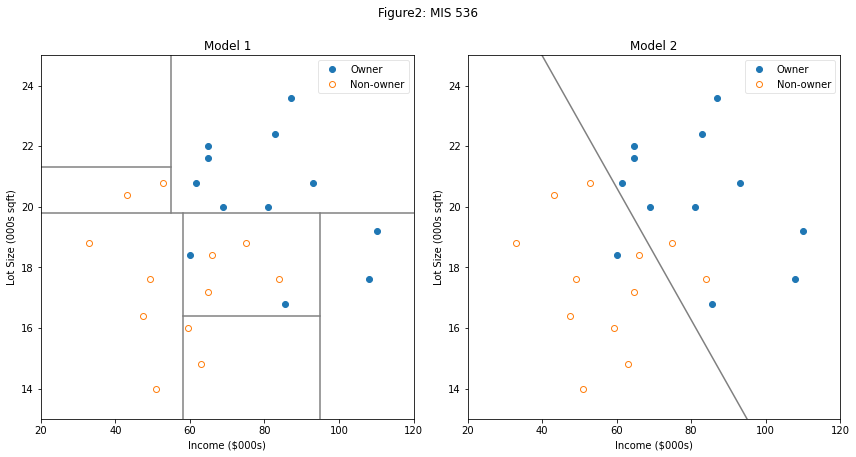

In [54]:
#########################
# STEP1 - Create the drawing area in which we will place of plots
#########################

fig = plt.figure(figsize=(12,6)) # this creates a figure - sort of a drawing space to create our plot

fig.suptitle("Figure2: MIS 536", multialignment='center', wrap=True, y=1.05) # add centered title to figure 
# more on subtitle here https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.suptitle.html
# note the use of y=1.1 in the above. The y (and x) coordinates in a figure go from 0 to 1. If we provide a value greater than 1, 
# we are displaying further aware from the figure - in this case, a value of 1.05 provide more space between the
# title on the plots below. You can adjust this value to match your own taste. 

#########################
# STEP2: Create two subplot areas
#########################

####
# STEP2a - Create First subplot (ax1)

# create a 1x2 plot area, and create a subplot area situated in the first location (to the left)
ax1 = fig.add_subplot(121, title="Model 1") # within a 1x2 grid, add ax1 as the first plot
# more on add_subplot here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

# now, we draw the subplot (ax1) by creating a scatter plot of our data

# here we select only the records in our data that are "owners" of mowers..
# then add a scatter plot of this data to our figure
mower_df.loc[mower_df.Ownership=='Owner'].plot(x='Income', y='Lot_Size', style='o', 
                                                   markerfacecolor='C0', markeredgecolor='C0', ax=ax1)

# here we select only the records in our data that are "Nonowner" of mowers..
# then add a scatter plot of this data to our figure
mower_df.loc[mower_df.Ownership=='Non-owner'].plot(x='Income', y='Lot_Size', style='o',
                                                      markerfacecolor='none', markeredgecolor='C1', ax=ax1)

# add legend and and axes data
ax1.legend(["Owner", "Non-owner"], framealpha=0.5);
ax1.set_xlim((20, 120))
ax1.set_ylim((13, 25))
ax1.set_xlabel('Income ($000s)')
ax1.set_ylabel('Lot Size (000s sqft)')

# now, draw a predictive (decision tree) model on plot1
y0, y1, y2 = 21.3, 19.8, 16.4
x0, x1, x2 = 55, 58, 95
ax1.plot((20, x0), (y0,y0), color='grey')
ax1.plot((20, 120), (y1,y1), color='grey')
ax1.plot((x1, x2), (y2,y2), color='grey')
ax1.plot((x0, x0), (25,y1), color='grey')
ax1.plot((x1, x1), (y1,13), color='grey')
ax1.plot((x2, x2), (y1,13), color='grey')

####
# Step 2b: Create second subplot (ax2)

# within a 1x2 plot area (1 row, 2 columns), and create a subplot area situated in the second location (to the right)
ax2 = fig.add_subplot(122, title="Model 2") # within a 1x2 grid, add ax1 as the first plot

# here we select only the records in our data that are "Nonowner" of mowers..
# then add a scatter plot of this data to our figure
mower_df.loc[mower_df.Ownership=='Owner'].plot(x='Income', y='Lot_Size', style='o', 
                                                   markerfacecolor='C0', markeredgecolor='C0', ax=ax2)
mower_df.loc[mower_df.Ownership=='Non-owner'].plot(x='Income', y='Lot_Size', style='o',
                                                      markerfacecolor='none', markeredgecolor='C1', ax=ax2)
# add legend and and axes data


ax2.legend(["Owner", "Non-owner"], framealpha=0.5);
ax2.set_xlim((20, 120))
ax2.set_ylim((13, 25))
ax2.set_xlabel('Income ($000s)')
ax2.set_ylabel('Lot Size (000s sqft)')

# now, draw a predictive (linear) model on plot1
ax2.plot((40, 95), (25,13), color='grey')

####################
# Step3: Display the figure to the screen and save a copy to a file graphics file to be used later in a report (or other)
####################

# Set the layout style of the figure
fig.tight_layout()
# Safe a copy of the figure to a file (can be used to insert into a word document, or other)
fig.savefig("assignment1_q1_fig2.svg", format="svg")
# display the figure to the screen
fig.show()